In [ ]:
# Data manipulation
import pandas as pd  # for data cleaning and operations
import numpy as np   # for numerical operations and array handling

# Data visualization
import matplotlib.pyplot as plt  # for basic plotting
import seaborn as sns  # for enhanced visualizations

# Machine learning and text processing
from sklearn.feature_extraction.text import TfidfVectorizer  # for text vectorization
from sklearn.metrics.pairwise import cosine_similarity  # for similarity calculations

# Additional utilities
import os  # for operating system interactions
from scipy.sparse import coo_matrix  # for sparse matrix operations

In [ ]:
#Data Loading and preprocessing 
train_data=pd.read_csv('marketing_sample_for_walmart_5k_data.tsv',sep='\t')
print("=====================================================================================================================================================================================================================================================================================================================================")
sample=train_data.columns
print(sample)
print("=====================================================================================================================================================================================================================================================================================================================================")

In [ ]:
# Basic Operations
# train_data['Product Tags'] # shows specific column data
# train_data.shape #used to show total data of datasheet
train_data.isnull().sum() #used to show columns with null values
# train_data['Product Rating'].fillna(0,inplace=true)
train_data.duplicated().sum() # used to check all duplictes data in file

In [ ]:
train_data['Product Rating'].fillna(0,inplace=True)  #used to fill the nan values 
train_data["Product Reviews Count"].fillna(0,inplace=True)  #used to fill the nan values 
train_data['Product Category'].fillna('',inplace=True)  #used to fill the nan values 
train_data['Product Brand'].fillna('',inplace=True)  #used to fill the nan values 
train_data['Product Description'].fillna('',inplace=True)  #used to fill the nan values 

In [ ]:
#for shorter name
column_name_mapping = {   #is called dictionary
    'Uniq Id': 'ID',
    'Product Id': 'ProdID',
    'Product Rating': 'Rating',
    'Product Reviews Count': 'ReviewCount',
    'Product Category': 'Category',
    'Product Brand': 'Brand',
    'Product Name': 'Name',
    'Product Image Url': 'ImageURL',
    'Product Description': 'Description',
    'Product Tags': 'Tags',
    'Product Contents': 'Contents'
}
train_data.rename(columns=column_name_mapping, inplace=True)

In [ ]:
train_data['ID']=train_data['ID'].str.extract(r'(\d+)').astype(float)
train_data['ProdID']=train_data['ProdID'].str.extract(r'(\d+)').astype(float)


In [ ]:
# EDA (Exploratory Data Analysis)

num_users = train_data['ID'].nunique()
num_items = train_data['ProdID'].nunique()
num_ratings = train_data['Rating'].nunique()
print(f"Number Of Unique Users", {num_users})
print(f"Number Of Unique Items", {num_items})
print(f"Number Of Unique Rating", {num_ratings})






In [ ]:
# Pivot the dataframe to create heatmap
heatmap_data = train_data.pivot_table('ID',"Rating")
# Creating heatmap
plt.figure(figsize=(12,10))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='coolwarm', cbar=True)
plt.title('Heatmap Of User Ratings')
plt.xlabel('Ratings')
plt.ylabel('User ID')
plt.show()



In [ ]:
# Distribution Of Interaction
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
train_data['ID'].value_counts().hist(bins=10, edgecolor='k')
plt.xlabel("Interactions Per User")
plt.ylabel("Number Of Users")
plt.title("Distribution Of Interactions Per User")

plt.subplot(1,2,2)
train_data['ProdID'].value_counts().hist(bins=10, edgecolor='k', color='green')
plt.xlabel("Interactions Per Items")
plt.ylabel("Number Of Items")
plt.title("Distribution Of Interactions Per Items")

plt.tight_layout()
plt.show()




Text(0.5, 1.0, 'Most Popular Items')

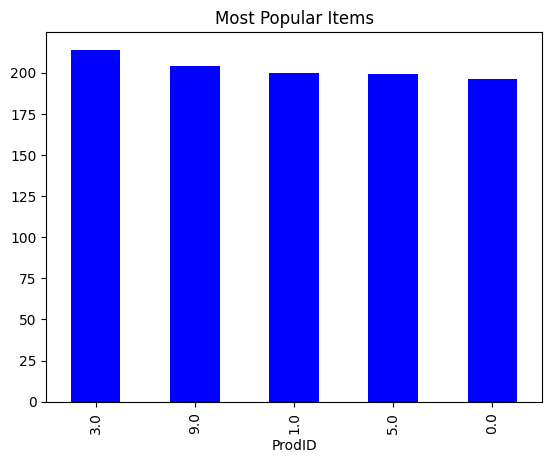

In [95]:
# Most Popular Items
popular_items = train_data['ProdID'].value_counts().head(5)
popular_items.plot(kind='bar',color='blue')
plt.title("Most Popular Items")